## Notas de aula de Álgebra Linear <br> Autor: Jonas Maziero
Link para os vídeos das aulas sobre esse tópico: https://youtu.be/ES9u9WG7UOc, https://youtu.be/GB6ZOsBcVpE, https://youtu.be/t0lGgrWntJU e .

In [94]:
%run init.ipynb

# Determinantes

---
## Função sinal
A função sinal, $sgn$, tem como domínio listas $j_{1},j_{2},\cdots,j_{n}$ de números naturais e como imagem $-1,0,1$. Para uma lista com $n$ números, por definição
\begin{equation}
sgn_{n}(1,2,\cdots,n) := 1. 
\end{equation}
Note que o subescrito indica o número de números no argumento da função sinal. Se quaisquer pares de índices são _iguais_, a função sinal é nula
\begin{equation}
sgn_{n}(j_{1},j_{2},\cdots,j_{n}) := 0 
\end{equation}
se $j_{p}=j_{q}$ para algum par $(p,q)$. Se precisamos fazer um número _par_ de trocas entre pares de índices de $j_{1},j_{2},\cdots,j_{n}$ para obter $1,2,\cdots,n$ então
\begin{equation}
sgn_{n}(j_{1},j_{2},\cdots,j_{n}) := +1. 
\end{equation}
Se precisamos fazer um número _ímpar_ de trocas entre pares de índices de $j_{1},j_{2},\cdots,j_{n}$ para obter $1,2,\cdots,n$ então
\begin{equation}
sgn_{n}(j_{1},j_{2},\cdots,j_{n}) := -1. 
\end{equation}
Outra propriedade que define a função sinal é
\begin{equation}
sgn_{n}(\cdots,j_{p-1},j_{p},j_{p+1},\cdots) := (-1)^{n-p}sgn_{n-1}(\cdots,j_{p-1},j_{p+1},\cdots) 
\end{equation}
e relaciona a função sinal aplicada a listas com $n$ e $n-1$ números. Note que $p$ é a posição de onde sacamos o número da lista original.

##### Exemplo: $sgn_{2}$
Para dois índices, teremos $sgn_{2}(1,1)=sgn_{2}(2,2)=0$, $sgn_{2}(1,2)=1$ e $sgn_{2}(2,1)=-1$.

##### Exemplo: $sgn_{3}\rightarrow sgn_{2}$
Consideremos e.g. o caso de tirar um número da 2ª posição em uma sequência de 3 números. A relação entre as funções sinal é $sgn_{3}(j_{1},j_{2},j_{3})=(-1)^{3-2}sgn_{2}(j_{1},j_{3})=-sgn_{2}(j_{1},j_{3})$. Um exemplo específico seria $sgn_{3}(1,2,3)=-sgn_{2}(1,3)\therefore sgn_{2}(1,3)=-1$.

### Antisimetria da função sinal
Em vistas das propriedades acima, não é difícil notar que ao trocarmos dois índices quaisquer do argumento da função sinal trocamos o seu sinal, se esta não for nula, i.e.,
\begin{equation}
sgn_{n}(\cdots,j_{p},\cdots,j_{q},\cdots) = -sgn_{n}(\cdots,j_{q},\cdots,j_{p},\cdots). 
\end{equation}
Isso porquê se para ir de $\cdots,j_{q},\cdots,j_{p},\cdots$ para $1,2,\cdots,n$ precisamos de um número par de trocas de pares de índices, para ir de $\cdots,j_{p},\cdots,j_{q},\cdots$ para $1,2,\cdots,n$ precisaremos de um número ímpar de trocas de pares de índices, e vice versa.

### Vizinhos distantes vs primeiros vizinhos
A função sinal calculada com a restrição de trocas entre primeiros vizinhos é equivalente ao cálculo com troca entre vizinhos distantes. Ou seja, $sgn_{n}(\cdots,j_{p},\cdots,j_{q},\cdots) = -sgn_{n}(\cdots,j_{q},\cdots,j_{p},\cdots)$ é obtido também quando nos restringimos a trocas entre primeiros vizinhos. Para isso notemos que são precisas
\begin{equation}
2(q-p)-1 \text{ trocas de sprimeiros vizinhos para obter }(\cdots,j_{p},\cdots,j_{q},\cdots) \text{ de } (\cdots,j_{q},\cdots,j_{p},\cdots) \text{, ou vice versa.}
\end{equation}
Na verdade, precisamos de $q-p$ trocas para colocar $j_{p}$ na posição $q$. Como, ao finalizar essa etapa, $j_{q}$ estará na posição $q-1$, precisaremos de mais $(q-p)-1$ trocas de primeiros vizinhos para colocar $j_{q}$ na posição $p$. Mas, como cada troca de pares de números troca o sinal da função sinal,
\begin{equation}
(-1)^{2(q-p)-1}=(-1)^{2(q-p)}(-1)^{-1}=(1)\frac{1}{(-1)^{1}}=-1,
\end{equation}
que é o resultado que queríamos demonstrar.

Vamos considerar um caso particular (queremos trocar $3$ e $6$): 
\begin{equation}
(\cdots,3,4,5,6,\cdots)\rightarrow(\cdots,3,4,6,5,\cdots)\rightarrow(\cdots,3,6,4,5,\cdots)\rightarrow(\cdots,6,3,4,5,\cdots).
\end{equation}
Até aqui usamos $q-p=6-3=3$ trocas. Seguindo 
\begin{equation}
(\cdots,6,3,4,5,\cdots)\rightarrow(\cdots,6,4,3,5,\cdots)\rightarrow(\cdots,6,4,5,3,\cdots).
\end{equation}
Ou seja, usamos mais $q-p-1=6-3-1=2$ trocas. Isso nos dá um total de $2(q-p)-1=2(6-3)-1=5$ trocas entre primeiros vizinhos.

### Algoritmo para calcular $sgn$
Qualquer algoritmo de ordenamento de listas de números pode ser adaptado para calcular a função sinal. Eu adaptei o algoritmo denominado Bubble Sort, que consiste em comparar pares vizinhos do início ao fim da sequência, efetuando trocas quando estiverem em ordem decrescente. Na $j$-ésima aplicação desse procedimento teremos colocado os maiores números desde a posição $n$ até a posição $n-j$. Veja alguns exemplos usando o código abaixo.

In [67]:
def sgn(A): # A is an list or array containing the sequence of numbers
    n = len(A); np=0
    for k in range(n-1,0,-1):
        for j in range(0,k):
            if A[j+1] < A[j]:
                tmp=A[j]; A[j]=A[j+1]; A[j+1]=tmp; np+=1#; print('A=',A)
    for j in range(0,n-1):
        if A[j] == A[j+1]:
            return 0
    if np%2 == 0:
        return 1
    else:
        return -1

In [66]:
A=[5,2,4,1,3]; s=sgn(A)

A= [2, 5, 4, 1, 3]
A= [2, 4, 5, 1, 3]
A= [2, 4, 1, 5, 3]
A= [2, 4, 1, 3, 5]
A= [2, 1, 4, 3, 5]
A= [2, 1, 3, 4, 5]
A= [1, 2, 3, 4, 5]


In [68]:
n=2
for j in range(1,n+1):
    for k in range(1,n+1):
        A = [j,k]; s = sgn(A); print(j,',',k,':',s)

1 , 1 : 0
1 , 2 : 1
2 , 1 : -1
2 , 2 : 0


In [92]:
n=3
for j in range(1,n+1):
    for k in range(1,n+1):
        for l in range(1,n+1):
            A = [j,k,l]; s = sgn(A)#; print(j,',',k,',',l,':',s)

### Número de combinações de $n$ números
Consideremos números do conjunto $\{1,2,3,\cdots,n-1,n\}$. Vamos obter o número total de combinações de $n$ números nos casos onde permitimos ou não permitimos repetições. Esse tipo de estimativa é importante para estabelecermos a complexidade computacional de uma certa função. Considere que temos $n$ caixas, e vamos obter o número de possibilidades para colocarmos $n$ bolinhas numeradas nessas $n$ caixas:
#### Com repetição
Para a 1ª caixa temos $n$ possibilidades. Uma vez ocupada a 1ª caixa, como são permitidas repetições, temos também $n$ possibilidades para a 2ª caixa. Como para todas as outras caixas temos o raciocínio similar, obtemos
\begin{equation}
n^{n}=(n)(n)\cdots(n) \text{ combinações de } n \text{ números, com possibilidade de repetição.}
\end{equation}
Com os exemplos acima, vemos prontamente que esse é o caso para $n=2\therefore 2^{2}=4$ e para $n=3\therefore 3^{3}=27$.
#### Sem repetição
Se um número não pode aparecer em mais de uma caixa, teremos o seguinte. Para a 1ª caixa temos $n$ possibilidades. Uma vez preenchida essa caixa, o tal número não poderá ser utilizado novamente. Assim, para a 2ª caixa temos $n-1$ possibilidades. E a mesma ideia se aplica para as caixas seguintes, sempre diminuindo de uma possibilidade em relação à anterior, até na para a última caixa teremos uma única possibilidade. Ao todo teremos então
\begin{equation}
n!=(n)(n-1)(n-2)\cdots(2)(1) \text{ combinações de } n \text{ números, sem possibilidade de repetição.}
\end{equation}
Nesse caso, para $n=2$ temos $2!=2$ combinações, que são $(1,2)$ e $(2,1)$. Para $n=3$ temos $3!=6$ combinções, que são $(1,2,3)$, $(1,3,2)$, $(2,1,3)$, $(2,3,1)$, $(3,1,2)$, $(3,2,1)$. 

##### Permutação
Esse último tipo de sequência, sem repetição, é chamado de permutação e será importante para o estudo sobre determinantes que faremos a seguir.

## Determinante
Seja $A=(A_{j,k})$ uma matriz $n\mathrm{x}n$. Lembrando, $A_{j,k}$ é o elemento de matriz localizado na linha $j$ e na coluna $k$. Aqui consideraremos como campo escalar $A_{j,k}\in\mathbb{C}$. No entanto, todos os resultados que obteremos são extendidos facilmente para o caso particular $A_{j,k}\in\mathbb{R}$.

O determinante de uma matriz quadrada $A$ é uma mapa $\det:\mathbb{C}^{n\mathrm{x}n}\rightarrow \mathbb{C}$ definido por
\begin{equation}
\det(A) := \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn_{n}(j_{1},j_{2},\cdots,j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n,j_{n}}.
\end{equation}

Note que usamos as chamadas permutações de $n$ índices, $(j_{1},j_{2},\cdots,j_{n})$, que são sequências com os números todos diferentes. Isso porque se houver dois ou mais índices iguais, a função sinal é nula. Claro, se somarmos sobre todas as sequências $j_{1},j_{2},\cdots,j_{n}$ (com repetição de índices), o resultado final para o determinante será o mesmo:
\begin{equation}
\det(A) \equiv \sum_{j_{1},j_{2},\cdots,j_{n}}sgn_{n}(j_{1},j_{2},\cdots,j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n,j_{n}}.
\end{equation}

Outra observação relevante aqui é que o determinante é calculado considerando-se o produto de elementos de matriz de linhas e colunas diferentes, somando ou subtraindo esses produtos para todas as combinações de colunas com base no sinal da permutação correspondente. 

Doravante nos abstemos de usar o sub-índice que indica o número de números no argumento de $sgn$, a menos que seja realmente necessário.

#### Exemplo: $A\in\mathbb{C}$
Para um escalar, o determinante é o próprio escalar, i.e., $\det(A)=A$.

#### Exemplo: $A\in\mathbb{C}^{2\mathrm{x}2}$
Nesse caso teremos
\begin{align}
\det(A) &= \sum_{(j_{1},j_{2})}sgn(j_{1},j_{2})A_{1j_{1}}A_{2j_{2}} = sgn(1,2)A_{1,1}A_{2,2} + sgn(2,1)A_{1,2}A_{2,1} \\ &= A_{1,1}A_{2,2} - A_{1,2}A_{2,1}.
\end{align}

In [90]:
A = Matrix([[1,2,3],[6,5,6],[7,18,29]]); A.det()

## Propriedades do determinante

### $\det(cA)=c^{n}\det(A)$
Com $c\in\mathbb{C}$ e $A\in\mathbb{C}^{n\mathrm{x}n}$, para verificarmos essa igualdade basta aplicarmos a definição de determinante a matriz $cA$:
\begin{align}
\det(cA) &= \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn_{n}(j_{1},j_{2},\cdots,j_{n})(cA)_{1,j_{1}}(cA)_{2,j_{2}}\cdots (cA)_{n,j_{n}} \\
&= \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn_{n}(j_{1},j_{2},\cdots,j_{n})c(A_{1,j_{1}})c(A_{2,j_{2}})\cdots c(A_{n,j_{n}}) \\
&= c^{n}\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn_{n}(j_{1},j_{2},\cdots,j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n,j_{n}} \\
&=c^{n}\det(A).
\end{align}

### Definição
Seja $k_{1},k_{2},\cdots,k_{n}$ uma lista qualquer de números do conjunto $\{1,2,\cdots,n\}$. Denotaremos
\begin{equation}
A(k_{1},k_{2},\cdots,k_{n})
\end{equation}
a matriz cuja $l$-ésima linha é a $k_{l}$-ésima linha da matriz $A$.

#### Exemplos
Um exemplo trivial seria
\begin{equation}
A(1,2,\cdots,n)=A.
\end{equation}
Um outro exemplo simples seria
\begin{equation}
A(2,3,2) = \begin{bmatrix} A_{2,1} & A_{2,2} & A_{2,3} \\ A_{3,1} & A_{3,2} & A_{3,3} \\ A_{2,1} & A_{2,2} & A_{2,3} \end{bmatrix}.
\end{equation}


Para essas matrizes modificadas, notemos que, em relação a $A$, substituímos as linhas $1,2,\cdots,n$ pelas linhas $k_{1},k_{2},\cdots,k_{n}$. Então, o determinante dessa nova matriz fica escrito em termos dos elementos de matriz de $A$ como segue:
\begin{align}
\det(A(k_{1},k_{2},\cdots,k_{n})) &= \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A(k_{1},k_{2},\cdots,k_{n})_{1,j_{1}}A(k_{1},k_{2},\cdots,k_{n})_{2,j_{2}}\cdots A(k_{1},k_{2},\cdots,k_{n})_{n,j_{n}} \\
& =\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A_{k_{1},j_{1}}A_{k_{2},j_{2}}\cdots A_{k_{n},j_{n}}.
\end{align}

### Troca linhas $\Rightarrow$ troca o sinal do $\det$
Podemos utilizar o determinante escrito como na última equação para verificar que ao trocarmos duas linhas de uma matriz, trocaremos o sinal do seu determinante:
\begin{align}
\det(A(\cdots,k_{p},\cdots,k_{q},\cdots)) & =  \sum_{(\cdots,j_{p},\cdots,j_{q},\cdots)}sgn(\cdots,j_{p},\cdots,j_{q},\cdots)\cdots A_{k_{p},j_{p}}\cdots A_{k_{q},j_{q}}\cdots \\
& =  \sum_{(\cdots,j_{p},\cdots,j_{q},\cdots)}sgn(\cdots,j_{p},\cdots,j_{q},\cdots)\cdots A_{k_{q},j_{q}}\cdots A_{k_{p},j_{p}}\cdots \\
& =  \sum_{(\cdots,j_{p},\cdots,j_{q},\cdots)}-sgn(\cdots,j_{q},\cdots,j_{p},\cdots)\cdots A_{k_{q},j_{q}}\cdots A_{k_{p},j_{p}}\cdots \\
& = -\det(A(\cdots,k_{q},\cdots,k_{p},\cdots)).
\end{align}
Acima usamos o fato que a ordem dos fatores não altera o produto e que ao trocarmos um par de números no argumento da função sinal, mudamos seu sinal. Também usamos a equivalência $\sum_{(\cdots,j_{p},\cdots,j_{q},\cdots)}\equiv\sum_{(\cdots,j_{q},\cdots,j_{p},\cdots)}$, pois os índices da soma possuem o mesmo domínio.

##### Exemplo
Consideremos $A(1,2)=A$ e $A(2,1)$. Temos que
\begin{align}
\det(A(2,1)) & = \sum_{(j_{1},j_{2})}sgn(j_{1},j_{2})A_{k_{1},j_{1}}A_{k_{2},j_{2}} = \sum_{(j_{1},j_{2})}sgn(j_{1},j_{2})A_{2,j_{1}}A_{1,j_{2}} \\
& = sgn(1,2)A_{2,1}A_{1,2} + sgn(2,1)A_{2,2}A_{1,1}  = A_{2,1}A_{1,2} - A_{2,2}A_{1,1} \\
& = -(-A_{2,1}A_{1,2} + A_{2,2}A_{1,1})=-\det(A) = -\det(A(1,2)).
\end{align}

### Relação entre os determinantes de $A(k_{1},k_{2},\cdots,k_{n})$ e de $A$
Vamos mostrar que
\begin{equation}
\det(A(k_{1},k_{2},\cdots,k_{n})) = sgn(k_{1},k_{2},\cdots,k_{n})\det(A). \hspace{2cm} (\star)
\end{equation}
Para verificar $(\star)$, assuma que precisamos fazer $N$ permutações de pares índices para obter $1,2,\cdots,n$ a partir de $k_{1},k_{2},\cdots,k_{n}$. Lembre que trocas de pares de índices trocam o sinal da função sinal, i.e., \begin{equation}
sgn(k_{1},k_{2},\cdots,k_{n})=(-1)^{N}sgn(1,2,\cdots,n)=(-1)^{N}.
\end{equation}
Como em cada uma dessas trocas de pares de índices trocamos duas linhas da matriz correspondente, e com isso trocamos o sinal do determinante, teremos também que:
\begin{equation}
\det(A(k_{1},k_{2},\cdots,k_{n})) = (-1)^{N}\det(A(1,2,\cdots,n)) = (-1)^{N}\det(A),
\end{equation}
com o sinal que estabelece a relação entre os determinantes dependendo somente se $N$ é par ou ímpar. Com isso fica verificada nossa afirmação inicial.

#### Exemplo
\begin{align}
\det(A(2,3,1)) &= (-1)^{1}\det(A(2,1,3)) = (-1)^{2}\det(A(1,2,3)) \\
&= sgn(2,3,1)\det(A(1,2,3)).
\end{align}

### O determinante de uma matriz com 2 linhas iguais é $0$
Para isso considere que as linhas $k_{p}$ e $k_{q}$ da matriz $A$ são iguais. Assim
\begin{align}
& \det(A(\cdots,k_{p},\cdots,k_{q},\cdots)) = \det(A(\cdots,k_{p},\cdots,k_{q},\cdots)) \\
&= -\det(A(\cdots,k_{q},\cdots,k_{p},\cdots)),
\end{align}
onde a primeira igualdade se deve ao fato das duas matrizes serem iguais e a segunda segue pela troca de linhas. Como para que $x=−x$ devemos ter $x=0$, então $\det(A(\cdots,k_{p},\cdots,k_{q},\cdots))=0$ para $k_{p}=k_{q}$.

##### Exemplo  
\begin{align}
\det(A(1,2,1)) &= \sum_{(j_{1},j_{2},j_{3})}sgn(j_{1},j_{2},j_{3})A_{1,j_{1}}A_{2,j_{2}}A_{1,j_{3}} \\
& = sgn(1,2,3)A_{1,1}A_{2,2}A_{1,3} + sgn(1,3,2)A_{1,1}A_{2,3}A_{1,2} + sgn(2,1,3)A_{1,2}A_{2,1}A_{1,3} \\ 
&+ sgn(2,3,1)A_{1,2}A_{2,3}A_{1,1} + sgn(3,1,2)A_{1,3}A_{2,1}A_{1,2} + sgn(3,2,1)A_{1,3}A_{2,2}A_{1,1} \\
& = A_{1,1}A_{2,2}A_{1,3} -A_{1,1}A_{2,3}A_{1,2} -A_{1,2}A_{2,1}A_{1,3} + A_{1,2}A_{2,3}A_{1,1} + A_{1,3}A_{2,1}A_{1,2} -A_{1,3}A_{2,2}A_{1,1} \\
& =0.
\end{align}

### Linhas de $A$ são combinações lineares de outras linhas $\Rightarrow\det(A)=0$
Se uma (ou mais) linha(s) de uma matriz pode ser escrita como uma combinação linea de outras de suas linhas, então o determinante dessa matriz é 0. Na prática, como a troca de linhas só troca o sinal do determinante, podemos assumir, sem perda de generalidade, que a primeira linha é combinação linear das próximas $r<n$ linhas, i.e., 
\begin{equation}
A_{1,j_{1}}=\sum_{k=2}^{r}c_{k}A_{k,j_{1}}
\end{equation}
com $c_{k}\in\mathbb{C}$. Assim
\begin{align}
\det(A) & \propto \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})\left(\sum_{k=2}^{r}c_{k}A_{k,j_{1}}\right)A_{2,j_{2}}\cdots A_{r,j_{r}}\cdots A_{n,j_{n}} \\
& = \sum_{k=2}^{r}c_{k}\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A_{k,j_{1}}A_{2,j_{2}}\cdots A_{r,j_{r}}\cdots A_{n,j_{n}} \\
& = \sum_{k=2}^{r}c_{k}(\det\text{ de uma matriz com duas linhas iguais)} \\
& = \sum_{k=2}^{r}c_{k}0=0.
\end{align}

---
## Forma simétrica para o determinante
Vamos verificar que o determinante de uma matriz $A$ pode ser escrito como
\begin{equation}
\det(A) = \frac{1}{n!}\sum_{(k_{1},k_{2},\cdots,k_{n})}\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(k_{1},k_{2},\cdots,k_{n})sgn(j_{1},j_{2},\cdots,j_{n})A_{k_{1},j_{1}}A_{k_{2},j_{2}}\cdots A_{k_{n},j_{n}}.
\end{equation}
Começamos notando que para qualquer permutação $(k_{1},k_{2},\cdots,k_{n})$ teremos
\begin{equation}
sgn(k_{1},k_{2},\cdots,k_{n})sgn(k_{1},k_{2},\cdots,k_{n}) = (sgn(k_{1},k_{2},\cdots,k_{n}))^{2} = 1.
\end{equation}
Teremos assim, de $\det(A(k_{1},k_{2},\cdots,k_{n})) = sgn(k_{1},k_{2},\cdots,k_{n})\det(A)$, que:
\begin{equation}
sgn(k_{1},k_{2},\cdots,k_{n})\det(A(k_{1},k_{2},\cdots,k_{n})) = sgn(k_{1},k_{2},\cdots,k_{n})sgn(k_{1},k_{2},\cdots,k_{n})\det(A) = \det(A).
\end{equation}

Seguindo, notamos que existem $n!$ permutações de $n$ símbolos. Dito isto, reescrevemos a equação acima como
\begin{align}
\det(A) & = \frac{1}{n!}\sum_{i=1}^{n!}\det(A) \\
& = \frac{1}{n!}\sum_{(k_{1},k_{2},\cdots,k_{n})}sgn(k_{1},k_{2},\cdots,k_{n})\det(A(k_{1},k_{2},\cdots,k_{n})) \\
& = \frac{1}{n!}\sum_{(k_{1},k_{2},\cdots,k_{n})}sgn(k_{1},k_{2},\cdots,k_{n})\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A_{k_{1},j_{1}}A_{k_{2},j_{2}}\cdots A_{k_{n},j_{n}},
\end{align}
como queríamos demonstrar.

#### Exemplo: $A\in\mathbb{C}^{2\mathrm{x}2}$
\begin{align}
\det(A) &= \frac{1}{2!}\sum_{(k_{1},k_{2})}\sum_{(j_{1},j_{2})}sgn(k_{1},k_{2})sgn(j_{1},j_{2})A_{k_{1},j_{1}}A_{k_{2},j_{2}} \\
& = \frac{1}{2}(sgn(1,2)sgn(1,2)A_{1,1}A_{2,2} + sgn(1,2)sgn(2,1)A_{1,2}A_{2,1} \\ 
& \hspace{1cm} + sgn(2,1)sgn(1,2)A_{2,1}A_{1,2} + sgn(2,1)sgn(2,1)A_{2,2}A_{1,1}) \\
& = \frac{1}{2}((+1)(+1)A_{1,1}A_{2,2} + (+1)(-1)A_{1,2}A_{2,1} \\ 
& \hspace{1cm} + (-1)(+1)A_{2,1}A_{1,2} + (-1)(-1)A_{2,2}A_{1,1}) \\
&= A_{1,1}A_{2,2}-A_{1,2}A_{2,1}.
\end{align}

## Determinante da transposta
A transposta de uma matriz $A=(A_{j,k})$ é denotada e definida por
\begin{equation}
A^{T}=((A^{T})_{j,k}) := (A_{k,j}).
\end{equation}
Ou seja, obtemos $A^{T}$ de $A$ trocando suas linhas por suas colunas e vice versa. Vamos verificar o importante resultado de que o determinante da transposta de uma matriz qualquer é igual ao seu determinante:
\begin{equation}
\det(A^{T}) = \det(A).
\end{equation}
Para verificar esse resultado, usamos a forma simétrica do determinante
\begin{align}
\det(A^{T}) & = \frac{1}{n!}\sum_{(k_{1},k_{2},\cdots,k_{n})}\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(k_{1},k_{2},\cdots,k_{n})sgn(j_{1},j_{2},\cdots,j_{n})(A^{T})_{k_{1},j_{1}}(A^{T})_{k_{2},j_{2}}\cdots (A^{T})_{k_{n},j_{n}} \\
& = \frac{1}{n!}\sum_{(k_{1},k_{2},\cdots,k_{n})}\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(k_{1},k_{2},\cdots,k_{n})sgn(j_{1},j_{2},\cdots,j_{n})A_{j_{1},k_{1}}A_{j_{2},k_{2}}\cdots A_{j_{n},k_{n}} \\
& = \frac{1}{n!}\sum_{(j_{1},j_{2},\cdots,j_{n})}\sum_{(k_{1},k_{2},\cdots,k_{n})}sgn(j_{1},j_{2},\cdots,j_{n})sgn(k_{1},k_{2},\cdots,k_{n})A_{j_{1},k_{1}}A_{j_{2},k_{2}}\cdots A_{j_{n},k_{n}} \\
& = \det(A).
\end{align}

##### Exemplo
Para $A\in\mathbb{C}^{2\mathrm{x}2}$ teremos
\begin{align}
\det(A^{T}) &= \sum_{j_{1},j_{2}}sgn(j_{1},j_{2})(A^{T})_{1,j_{1}}(A^{T})_{2,j_{2}} \\
&= sgn(1,2)(A^{T})_{1,1}(A^{T})_{2,2} + sgn(2,1)(A^{T})_{1,2}(A^{T})_{2,1} \\
&= A_{1,1}A_{2,2} -A_{2,1}A_{1,2} \\
&=\det(A).
\end{align}

## Autovalores da transposta
Autovalores serão discutidos em mais profundidade mais adiante. Aqui basta saber que obtemos os autovalores $a$ de uma matriz $A$ resolvendo a equação característica
\begin{equation}
\det(A-a\mathbb{I}_{n})=0,
\end{equation}
em que $\mathbb{I}_{n}=(\delta_{j,k})$ é a matriz identidade $n\mathrm{x}n.$ Para a transposta da matrix $A$ teremos que resolver $\det(A^{T}-\alpha\mathbb{I}_{n})=0.$ Notemos que a transposta da soma de matrizes é a soma das transpostas:
\begin{align}
(A+B)^{T} & = ((A_{j,k})+(B_{j,k}))^{T} =: (A_{j,k}+B_{j,k})^{T} \equiv (C_{j,k})^{T} \\
&= (C_{k,j}) = (A_{k,j}+B_{k,j}) = (A_{k,j})+(B_{k,j}) = ((A^{T})_{j,k})+((B^{T})_{j,k}) \\
&= A^{T}+B^{T}.
\end{align}
Assim, podemos escrever
\begin{equation}
0=\det(A^{T}-\alpha\mathbb{I}_{n})=\det(A^{T}+(-\alpha\mathbb{I}_{n})^{T})=\det((A-\alpha\mathbb{I}_{n})^{T})=\det(A-\alpha\mathbb{I}_{n}),
\end{equation}
o que implica que $\alpha=a$, cqd. Note que na última igualdade usamos o fato de que $\det(X)=\det(X^{T})$ pra qualquer matriz $X$. Também usamos que a transposta de uma matriz diagonal é a própria matriz, pois
\begin{equation}
D=(D_{j,j}\delta_{j,k}) \therefore D^{T} = (D_{j,j}\delta_{k,j}) = (D_{j,j}\delta_{j,k}) = D.
\end{equation}

### det da conjugada = conjugado do det
A conjugada de uma matriz $A\in\mathbb{C}^{n\text{x}n}$ é denotada $A^{*}\in\mathbb{C}^{n\text{x}n}$ e é definida por 
\begin{equation}
A^{*}=((A^{*})_{j,k}):=(A_{j,k}^{*}).
\end{equation}
Usando as propriedades básicas dos números complexos, teremos
\begin{align}
\det(A^{*}) &= \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})(A^{*})_{1,j_{1}}(A^{*})_{2,j_{2}}\cdots (A^{*})_{n,j_{n}} \\
&= \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A^{*}_{1,j_{1}}A^{*}_{2,j_{2}}\cdots A^{*}_{n,j_{n}} \\
&= \sum_{(j_{1},j_{2},\cdots,j_{n})}\left(sgn(j_{1},j_{2},\cdots,j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n,j_{n}}\right)^{*} \\
&= \left(\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n,j_{n}}\right)^{*} \\
&= \left(\det(A)\right)^{*}.
\end{align}
em que usamos que a função sinal é um número real, que o conjugado do produto é o produto dos conjugados e que o conjugado da soma é a soma dos conjugados.

### Adjunta
A adjunta de uma matriz $A\in\mathbb{C}^{n\text{x}n}$ é denotada por $A^{\dagger}\in\mathbb{C}^{n\text{x}n}$ e é definida como sua transposta conjugada $A^{\dagger}=(A^{*})^{T}=(A^{T})^{*}$, i.e., 
\begin{equation}
A^{\dagger}=((A^{\dagger})_{j,k}):=(A_{k,j}^{*}).
\end{equation}
Pode-se verificar que o determinante e os autovalores de $A^{\dagger}$ são iguais ao complexo conjugado do determinante e dos autovalores de $A$, respectivamente.

## Troca colunas $\Rightarrow$ troca o sinal do $\det$
Ao trocarmos duas colunas de uma matriz $A$, trocamos as linhas correspondentes de sua transposta $A^{T}$. Como $\det(A)=\det(A^{T})$ e a troca de linhas troca o sinal do determinante, vemos que o sinal do determinante também troca ao trocarmos duas de suas colunas.

De maneira análoga, pode-se verificar que para uma matriz com uma coluna sendo uma _combinação linear_ de outras de suas colunas, o determinante é igual a zero.

## Produto de matrizes
Vamos começar considerando o produto de duas matrizes $A\in\mathbb{C}^{n\mathrm{x}m}$ e $B\in\mathbb{C}^{m\mathrm{x}p}$ e usando a regra de multiplicação de matrizes bem conhecida de vocês:
\begin{align}
AB&=\begin{bmatrix}A_{1,1}&A_{1,2}&\cdots&A_{1,m}\\A_{2,1}&A_{2,2}&\cdots&A_{2,m}\\\vdots&\vdots&\cdots&\vdots\\A_{n,1}&A_{n,2}&\cdots&A_{n,m}\end{bmatrix}
\begin{bmatrix}B_{1,1}&B_{1,2}&\cdots&B_{1,p}\\B_{2,1}&B_{2,2}&\cdots&B_{2,p}\\\vdots&\vdots&\cdots&\vdots\\B_{m,1}&B_{m,2}&\cdots&B_{m,p}\end{bmatrix} \\
&=\begin{bmatrix}
(A_{1,1}B_{1,1}+A_{1,2}B_{2,1}+\cdots+A_{1,m}B_{m,1})&
(A_{1,1}B_{1,2}+A_{1,2}B_{2,2}+\cdots+A_{1,m}B_{m,2})&\cdots&
(A_{1,1}B_{1,p}+A_{1,2}B_{2,p}+\cdots+A_{1,m}B_{m,p}) 
\\
(A_{2,1}B_{1,1}+A_{2,2}B_{2,1}+\cdots+A_{2,m}B_{m,1})&
(A_{2,1}B_{1,2}+A_{2,2}B_{2,2}+\cdots+A_{2,m}B_{m,2})&\cdots&
(A_{2,1}B_{1,p}+A_{2,2}B_{2,p}+\cdots+A_{2,m}B_{m,p}) 
\\
\vdots&\vdots&\cdots&\vdots
\\
(A_{n,1}B_{1,1}+A_{n,2}B_{2,1}+\cdots+A_{n,m}B_{m,1})&
(A_{n,1}B_{1,2}+A_{n,2}B_{2,2}+\cdots+A_{n,m}B_{m,2})&\cdots&
(A_{n,1}B_{1,p}+A_{n,2}B_{2,p}+\cdots+A_{n,m}B_{m,p}) 
\end{bmatrix} \\
& =\begin{bmatrix}C_{1,1}&C_{1,2}&\cdots&C_{1,p}\\C_{2,1}&C_{2,2}&\cdots&C_{2,p}\\\vdots&\vdots&\cdots&\vdots\\C_{n,1}&C_{n,2}&\cdots&C_{n,p}\end{bmatrix}.
\end{align}
O produto dessas matrizes é portanto uma matriz $C\in\mathbb{C}^{n\mathrm{x}p}$ com elementos
\begin{equation}
C_{j,k} = (AB)_{j,k} = \sum_{l=1}^{m}A_{j,l}B_{l,k}.
\end{equation}

## Determinante do produto = produto dos determinantes
Aplicando esse resultado para o produto de matrizes, teremos
\begin{align}
\det(AB) & = \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})(AB)_{1,j_{1}}(AB)_{2,j_{2}}\cdots (AB)_{n,j_{n}} \\
& = \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})\sum_{k_{1}}A_{1,k_{1}}B_{k_{1},j_{1}}\sum_{k_{2}}A_{2,k_{2}}B_{k_{2},j_{2}}\cdots \sum_{k_{n}}A_{n,k_{n}}B_{k_{n},j_{n}} \\
& = \sum_{k_{1},k_{2},\cdots,k_{n}}A_{1,k_{1}}A_{2,k_{2}}\cdots A_{n,k_{n}}\sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})B_{k_{1},j_{1}}B_{k_{2},j_{2}}\cdots B_{k_{n},j_{n}} \\
& = \sum_{k_{1},k_{2},\cdots,k_{n}}A_{1,k_{1}}A_{2,k_{2}}\cdots A_{n,k_{n}}\det(B(k_{1},k_{2},\cdots,k_{n})) \\
& = \sum_{k_{1},k_{2},\cdots,k_{n}}A_{1,k_{1}}A_{2,k_{2}}\cdots A_{n,k_{n}}sgn(k_{1},k_{2},\cdots,k_{n})\det(B) \\
& = \sum_{(k_{1},k_{2},\cdots,k_{n})}sgn(k_{1},k_{2},\cdots,k_{n})A_{1,k_{1}}A_{2,k_{2}}\cdots A_{n,k_{n}}\det(B) \\
& = \det(A)\det(B).
\end{align}

## Determinante da soma $\ne$ soma dos determinantes
Em geral, o determinante da soma não é igual a soma dos determinantes:
\begin{align}
\det(A+B) & = \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})(A+B)_{1,j_{1}}(A+B)_{2,j_{2}}\cdots (A+B)_{n,j_{n}} \\
& = \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})(A_{1,j_{1}}+B_{1,j_{1}})(A_{2,j_{2}}+B_{2,j_{2}})\cdots (A_{n,j_{n}}+B_{n,j_{n}}) \\
& = \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n,j_{n}} \\
& + \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})B_{1,j_{1}}B_{2,j_{2}}\cdots B_{n,j_{n}} \\
& + \sum_{(j_{1},j_{2},\cdots,j_{n})}sgn(j_{1},j_{2},\cdots,j_{n})(\text{termos com produtos de A's e B's})\\
& = \det(A) + \det(B) + (\text{termo, em geral, não nulo}).
\end{align}

##### Exemplos
Para obter um exemplo em que a igualdade é satisfeita, consideremos $A=\begin{bmatrix}A_{11}&0\\0&A_{22}\end{bmatrix}$ e $B=\begin{bmatrix}0&B_{12}\\B_{21}&0\end{bmatrix}$ teremos
$\det(A)=A_{11}A_{22}$, $\det(B)=-B_{12}B_{21}$ e $\det(A+B)=\det\begin{bmatrix}A_{11}&B_{12}\\B_{21}&B_{22}\end{bmatrix}=A_{11}A_{22}-B_{12}B_{21}=\det(A)+\det(B)$.

Um exemplo onde a igualdade não se sustenta é obtido com a simples modificação $A\rightarrow A'=\begin{bmatrix}A_{11}&A_{12}\\0&A_{22}\end{bmatrix}$. Nesse caso $\det(A'+B)=\det\begin{bmatrix}A_{11}&A_{12}+B_{12}\\B_{21}&B_{22}\end{bmatrix}=A_{11}A_{22}-(A_{12}+B_{12})B_{21}\ne\det(A')+\det(B)=\det(A)+\det(B)$.


#### Implicação se a igualdade fosse válida em geral
Considere que $\det(A-a\mathbb{I})=0$ e $\det(B-b\mathbb{I})=0$. Se $\det(X+Y)=\det(X)+\det(Y)$ fosse verdade de forma geral, teríamos que os autovalores da soma seriam a soma dos autovalores, pois
\begin{align}
0 & = 0+0 =\det(A-a\mathbb{I})+\det(B-b\mathbb{I}) = \det(A-a\mathbb{I} + B-b\mathbb{I}) \\
& =  \det((A+B) -(a+b)\mathbb{I}).
\end{align}

---
## Expansão em cofatores para o determinante
### Lema
Sejam $A,B,C\in\mathbb{C}^{n\text{x}n}$ matrizes que são iguais a menos da $k$-ésima linha. Essa linha de $C$ é uma combinação linear das linhas correspondentes de $A$ e $B$, i.e., 
\begin{equation}
C_{k,j_{k}} = \alpha A_{k,j_{k}}+\beta B_{k,j_{k}}
\end{equation}
com $\alpha,\beta\in\mathbb{C}$. Para estas matrizes, temos
\begin{equation}
\det(C)=\alpha\det(A)+\beta\det(B).
\end{equation}
#### Prova
Com foco na linha $k$, usamos a definição de determinante para escrever
\begin{align}
\det(C) & = \sum_{(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)}sgn(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)\cdots C_{k-1,j_{k-1}}C_{k,j_{k}}C_{k+1,j_{k+1}}\cdots \\
& = \sum_{(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)}sgn(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)\cdots C_{k-1,j_{k-1}} (\alpha A_{k,j_{k}}+\beta B_{k,j_{k}})C_{k+1,j_{k+1}}\cdots \\
& = \alpha\sum_{(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)}sgn(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)\cdots C_{k-1,j_{k-1}} A_{k,j_{k}}C_{k+1,j_{k+1}}\cdots \\
& + \beta\sum_{(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)}sgn(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)\cdots C_{k-1,j_{k-1}} B_{k,j_{k}}C_{k+1,j_{k+1}}\cdots \\
& = \alpha\sum_{(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)}sgn(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)\cdots A_{k-1,j_{k-1}} A_{k,j_{k}}A_{k+1,j_{k+1}}\cdots \\
& + \beta\sum_{(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)}sgn(\cdots,j_{k-1},j_{k},j_{k+1},\cdots)\cdots B_{k-1,j_{k-1}} B_{k,j_{k}}B_{k+1,j_{k+1}}\cdots \\
& = \alpha\det(A)+\beta\det(B).
\end{align}
Pode-se verificar que o mesmo tipo de resultado no caso análogo de matrizes $A,B,C$ iguais a menos da coluna $k$, e com essa coluna de $C$ sendo combinação linear das colunas correspondentes de $A$ e de $B$.

### Lema
Seja
\begin{equation}
A = \begin{bmatrix} B & * \\ \mathbb{O} & b  \end{bmatrix}
\end{equation}
uma matriz $n\text{x}n$, onde $B$ é uma matriz $(n-1)\text{x}(n-1)$, $\mathbb{O}$ é uma matriz linha nula $1\text{x}(n-1)$, e $*$ é uma matriz coluna qualquer $(n-1)\text{x}1$. Segue que
\begin{equation}
\det(A)=b\det(B).
\end{equation}
#### Prova
Usando a definição de determinante a a propriedade da função sinal que relaciona $sgn_{n}$ e $sgn_{n-1}$, obteremos
\begin{align}
\det(A) & = \sum_{(j_{1},j_{2},\cdots,j_{n-1},j_{n})}sgn_{n}(j_{1},j_{2},\cdots,j_{n-1},j_{n})A_{1,j_{1}}A_{2,j_{2}}\cdots A_{n-1,j_{n-1}}A_{n,j_{n}} \\
& = \sum_{(j_{1},j_{2},\cdots,j_{n-1},j_{n})}sgn_{n}(j_{1},j_{2},\cdots,j_{n-1},j_{n})B_{1,j_{1}}B_{2,j_{2}}\cdots B_{n-1,j_{n-1}}b\delta_{n,j_{n}} \\
& = b\sum_{(j_{1},j_{2},\cdots,j_{n-1})}sgn_{n}(j_{1},j_{2},\cdots,j_{n-1},n)B_{1,j_{1}}B_{2,j_{2}}\cdots B_{n-1,j_{n-1}} \\
& = b\sum_{(j_{1},j_{2},\cdots,j_{n-1})}(-1)^{n-n}sgn_{n-1}(j_{1},j_{2},\cdots,j_{n-1})B_{1,j_{1}}B_{2,j_{2}}\cdots B_{n-1,j_{n-1}} \\
& = b\det(B).
\end{align}

### Menor de uma matriz
Por definição, o menor $A^{(j,k)}\in\mathbb{C}^{(n-1)\text{x}(n-1)}$ de uma matriz $A\in\mathbb{C}^{n\text{x}n}$ é obtido excluíndo-se a $j$-ésima linha e $k$-ésima coluna de $A$. <br>

##### Exemplo
\begin{equation}
A = \begin{bmatrix} 2 & 3 & 5 \\ 7 & 11 & 13 \\ 17 & 19 & 23  \end{bmatrix} \Rightarrow A^{(1,2)} = \begin{bmatrix} 7 & 13 \\ 17 & 23  \end{bmatrix}.
\end{equation}

### Matriz de cofatores de uma matriz
Por definição, a matriz de cofatores $cof(A)\in\mathbb{C}^{n\text{x}n}$ de uma matriz $A\in\mathbb{C}^{n\text{x}n}$ é obtida como segue
\begin{equation}
cof(A) = \left(cof(A)_{j,k}\right) := \left((-1)^{j+k}\det(A^{(j,k)})\right).
\end{equation}

##### Exemplo
Para a matriz do último exemplo, temos e.g. que
\begin{equation}
cof(A)_{1,2} = (-1)^{1+2}\det(A^{(1,2)}) = (-1)((7)(23)-(13)(17)) = 60.
\end{equation}

In [72]:
7*23-13*17

## Teorema (expansão em cofatores)
Seja $A\in\mathbb{C}^{n\text{x}n}$ com $n\ge2$. Podemos escrever o determinante dessa matriz como
\begin{equation}
\det(A) = \sum_{k=1}^{n}A_{j,k}cof(A)_{j,k}=\sum_{j=1}^{n}A_{j,k}cof(A)_{j,k},
\end{equation}
com a primeira sendo chamada de _expansão na linha $j$_ e a segunda é denominada _expansão na coluna $k$_.


### Prova
Considera um conjunto de $n$ matrizes $B^{(k)}\in\mathbb{C}^{n\text{x}n}$ que são iguais a $A$ a menos da $j$-ésima linha, cujos elementos são todos nulos a menos daquele na coluna $k$, que é igual a $A_{j,k}$. Então, se donotamos a $j$-ésima linha de $A$ por $\langle A_{j}|$ e similarmente para a $j$-ésima linha de $B^{(k)}$, $\langle B^{(k)}_{j}|$, teremos que
\begin{align}
\langle A_{j}| & := \begin{bmatrix} A_{j,1} & A_{j,2} & \cdots & A_{j,n} \end{bmatrix} \\
& = (1)\begin{bmatrix} A_{j,1} & 0 & \cdots & 0 \end{bmatrix} + (1)\begin{bmatrix} 0 & A_{j,2} & \cdots & 0 \end{bmatrix} +\cdots+ (1)\begin{bmatrix} 0 & 0 & \cdots & A_{j,n} \end{bmatrix} \\
& =: (1)\langle B^{(1)}_{j}| + (1)\langle B^{(2)}_{j}|+\cdots+(1)\langle B^{(n)}_{j}| \\
& = \sum_{k=1}^{n}(1)\langle B^{(k)}_{j}|.
\end{align}
Ou seja, a $j$-ésima linha de $A$ é uma combinação linear da $j$-ésima linha das matrizes $B^{(k)}$ para $k=1,\cdots,n$. Mas, em vistas do penúltimo lema que provamos, teremos que o determinante de $A$ é a combinação linear dos determinantes das matrizes $B^{(k)}$, com todos os coeficientes iguais a um:
\begin{equation}
\det(A) = \sum_{k=1}^{n}\det(B^{(k)}).
\end{equation}
Não é difícil de perceber, olhando para a prova do Lema, que este se extende para esse caso com $n$ matrizes no lugar de duas.

Para continuar com a prova faremos uso último lema que provamos. Lembrando, lá tínhamos uma matriz cuja $n$-ésima linha era nula a menos do elemento na $n$-ésima coluna. Precisamos colocar todas as matrizes $B^{(k)}$ nessa forma:
\begin{align}
& B^{(k)} = \begin{bmatrix} 
A_{1,1} & \cdots & A_{1,k-1} & A_{1,k} & A_{1,k+1} & \cdots & A_{1,n}  \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ A_{j-1,1} & \cdots & A_{j-1,k-1} & A_{j-1,k} & A_{j-1,k+1} & \cdots & A_{j-1,n} \\ 0 & \cdots & 0 & A_{j,k} & 0 & \cdots & 0  \\ A_{j+1,1} & \cdots & A_{j+1,k-1} & A_{j+1,k} & A_{j+1,k+1} & \cdots & A_{j+1,n} \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\ A_{n,1} & \cdots & A_{n,k-1} & A_{n,k} & A_{n,k+1} & \cdots & A_{n,n} \end{bmatrix} \\
& \xrightarrow[]{L_{j}\leftrightarrow L_{n}}
\begin{bmatrix} 
A_{1,1} & \cdots & A_{1,k-1} & A_{1,k} & A_{1,k+1} & \cdots & A_{1,n}  \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ A_{j-1,1} & \cdots & A_{j-1,k-1} & A_{j-1,k} & A_{j-1,k+1} & \cdots & A_{j-1,n}  \\ A_{j+1,1} & \cdots & A_{j+1,k-1} & A_{j+1,k} & A_{j+1,k+1} & \cdots & A_{j+1,n} \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\ A_{n,1} & \cdots & A_{n,k-1} & A_{n,k} & A_{n,k+1} & \cdots & A_{n,n} \\ 0 & \cdots & 0 & A_{j,k} & 0 & \cdots & 0 \end{bmatrix} \\
& \xrightarrow[]{C_{j}\leftrightarrow C_{n}}
\begin{bmatrix} 
A_{1,1} & \cdots & A_{1,k-1} & A_{1,k+1} & \cdots & A_{1,n} & A_{1,k}  \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ A_{j-1,1} & \cdots & A_{j-1,k-1} & A_{j-1,k+1} & \cdots & A_{j-1,n} & A_{j-1,k}  \\ A_{j+1,1} & \cdots & A_{j+1,k-1} & A_{j+1,k+1} & \cdots & A_{j+1,n} & A_{j+1,k} \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\ A_{n,1} & \cdots & A_{n,k-1} & A_{n,k+1} & \cdots & A_{n,n} & A_{n,k} \\ 0 & \cdots & 0 & 0 & \cdots & 0 & A_{j,k} \end{bmatrix},
\end{align}
onde para a primeira passagem fizemos $n-j$ trocas de linhas e para a segunda passagem fizemos $n-k$ trocas de colunas. 

Como para cada troca entre linhas ou colunas trocamos o sinal do determinante, teremos
\begin{align}
\det(B^{(k)}) & = (-1)^{n-k}(-1)^{n-j}\det
\begin{bmatrix} 
A_{1,1} & \cdots & A_{1,k-1} & A_{1,k+1} & \cdots & A_{1,n} & A_{1,k}  \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ A_{j-1,1} & \cdots & A_{j-1,k-1} & A_{j-1,k+1} & \cdots & A_{j-1,n} & A_{j-1,k}  \\ A_{j+1,1} & \cdots & A_{j+1,k-1} & A_{j+1,k+1} & \cdots & A_{j+1,n} & A_{j+1,k} \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\ A_{n,1} & \cdots & A_{n,k-1} & A_{n,k+1} & \cdots & A_{n,n} & A_{n,k} \\ 0 & \cdots & 0 & 0 & \cdots & 0 & A_{j,k} \end{bmatrix} \\
& = (-1)^{2n}(-1)^{-(j+k)}A_{j,k}\det
\begin{bmatrix} 
A_{1,1} & \cdots & A_{1,k-1} & A_{1,k+1} & \cdots & A_{1,n}  \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ A_{j-1,1} & \cdots & A_{j-1,k-1} & A_{j-1,k+1} & \cdots & A_{j-1,n}  \\ A_{j+1,1} & \cdots & A_{j+1,k-1} & A_{j+1,k+1} & \cdots & A_{j+1,n} \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\ A_{n,1} & \cdots & A_{n,k-1} & A_{n,k+1} & \cdots & A_{n,n} \end{bmatrix} \\
& = \frac{1}{(-1)^{j+k}}A_{j,k}\det(A^{(j,k)}) = (-1)^{j+k}A_{j,k}\det(A^{(j,k)}) = A_{j,k}cof(A)_{j,k}.
\end{align}
Com isso concluímos a verificação de que $\det(A) = \sum_{k=1}^{n}A_{j,k}cof(A)_{j,k}$. 

De forma análoga, pode-se verificar a expansão em cofatores na coluna $k$ de $A$, completando assim a forma do teorema. $\hspace{3cm}\square$

##### Exemplo
Determinante de uma matriz triangular inferior:
\begin{equation}
T = \begin{bmatrix}
T_{1,1} & 0 & 0 & \cdots & 0 \\
T_{2,1} & T_{2,2} & 0 & \cdots & 0 \\
T_{3,1} & T_{3,2} & T_{3,3} & \cdots &0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
T_{n-1,1} & T_{n-1,2} & T_{n-1,3} & \cdots & 0 \\
T_{n,1} & T_{n,2} & T_{n,3} & \cdots & T_{n,n}
\end{bmatrix}
\end{equation}
Expande em cofatores na primeira linha (sucessivas vezes):
\begin{align}
\det(T) & = T_{1,1}cof(T)_{1,1}+\sum_{k=2}^{n}0cof(T)_{1,k} = T_{1,1}(-1)^{1+1}\det(T^{(1,1)}) \\
& = T_{1,1}\det
\begin{bmatrix}
T_{2,2} & 0 & \cdots & 0 \\
T_{3,2} & T_{3,3} & \cdots &0 \\
\vdots & \vdots & \ddots & \vdots \\
T_{n-1,2} & T_{n-1,3} & \cdots & 0\\
T_{n,2} & T_{n,3} & \cdots & T_{n,n}
\end{bmatrix}  = T_{1,1}T_{2,2}(-1)^{1+1}\det\begin{bmatrix}
T_{3,3} & \cdots &0 \\
\vdots & \ddots & \vdots \\
T_{n-1,3} & \cdots & 0\\
T_{n,3} & \cdots & T_{n,n}
\end{bmatrix} \\
& \vdots \\
& = T_{1,1}T_{2,2}\cdots T_{n-2,n-2}\det\begin{bmatrix}
T_{n-1,n-1} & 0 \\
0 & T_{n,n}
\end{bmatrix}=\Pi_{j=1}^{n}T_{j,j}.
\end{align}

---
## Fórmula para a inversa
A inversa de uma matrix $A\in\mathbb{C}^{n\text{x}n}$ é denotada por $A^{-1}\in\mathbb{C}^{n\text{x}n}$ e é definida pelas igualdades:
\begin{equation}
A^{-1}A = AA^{-1} = \mathbb{I}_{n},
\end{equation}
com $\mathbb{I}_{n}$ sendo a matriz identidade $n\text{x}n$.

### Teorema
$A^{-1}$ existe se e somente se $\det(A)\ne 0$. 

Se $\det(A)\ne0$, os elementos de matriz da inversa podem ser escritos como:
\begin{equation}
(A^{-1})_{j,k} = \frac{cof(A)_{k,j}}{\det(A)}.
\end{equation}
Ou seja, identificamos a inversa de uma matriz $A$ com a transposta da sua matriz de cofatores dividida pelo determinante de $A$.

#### Prova
Começamos assumindo que a inversa existe. Então teremos que
\begin{align}
\det(A^{-1}A) &= \det(\mathbb{I}_{n}) = 1 \\
&= \det(A^{-1})\det(A),
\end{align}
o que implica que o determinante da matriz $A$ não pode ser nulo, i.e., 
\begin{equation}
\exists A^{-1}\Rightarrow \det(A)\ne0.
\end{equation}

Agora assuminos que $\det(A)\ne0$. Usando a expansão em cofatores podemos escrever
\begin{equation}
1 = \frac{\det(A)}{\det(A)} = \frac{\sum_{k=1}^{n}A_{j,k}cof(A)_{j,k}}{\det(A)} =: \sum_{k=1}^{n}A_{j,k}(A^{-1})_{k,j}=(AA^{-1})_{j,j} \text{ para }j=1,\cdots,n.
\end{equation}
De forma análoga, pode-se verificar que $(A^{-1}A)_{j,j}=1$ para $j=1,\cdots,n$.

Para provar que essa definição realmente fornece a inversa, falta ainda verificarmos que 
\begin{equation}
(A^{-1}A)_{j,k}=\sum_{l=1}^{n}(A^{-1})_{j,l}A_{l,k}=\frac{1}{\det(A)}\sum_{l=1}^{n}cof(A)_{l,j}A_{l,k}
\end{equation}
é nulo para todo $j\ne k$ (também devemos ter $(AA^{-1})_{j,k}\space\forall j\ne k$). Pra isso, vamos encontrar uma matriz cujo determinante possa ser escrito como nessa expressão mas que sabemos ser nulo. Consideremos uma matriz $B$ que é igual a $A$ a menos da coluna $k$, que é igual à coluna $l$ de $A$ (com $k>l$). Olhando para
\begin{align}
B & = \begin{bmatrix} \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots \\ \cdots&B_{j-1,l-1}&B_{j-1,l}&B_{j-1,l+1}&\cdots&B_{j-1,k-1}&B_{j-1,k}&B_{j-1,k+1}&\cdots \\ \cdots&B_{j,l-1}&B_{j,l}&B_{j,l+1}&\cdots&B_{j,k-1}&B_{j,k}&B_{j,k+1}&\cdots \\ \cdots&B_{j+1,l-1}&B_{j+1,l}&B_{j+1,l+1}&\cdots&B_{j+1,k-1}&B_{j+1,k}&B_{j+1,k+1}&\cdots \\ \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots  \end{bmatrix} 
\\
& = \begin{bmatrix} \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots \\ \cdots&A_{j-1,l-1}&A_{j-1,l}&A_{j-1,l+1}&\cdots&A_{j-1,k-1}&A_{j-1,l}&A_{j-1,k+1}&\cdots \\ \cdots&A_{j,l-1}&A_{j,l}&A_{j,l+1}&\cdots&A_{j,k-1}&A_{j,l}&A_{j,k+1}&\cdots \\ \cdots&A_{j+1,l-1}&A_{j+1,l}&A_{j+1,l+1}&\cdots&A_{j+1,k-1}&A_{j+1,l}&A_{j+1,k+1}&\cdots \\ \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots  \end{bmatrix}
\end{align}

vemos que os menores
\begin{equation}
B^{(j,k)} = \begin{bmatrix} \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots \\ \cdots&A_{j-1,l-1}&A_{j-1,l}&A_{j-1,l+1}&\cdots&A_{j-1,k-1}&A_{j-1,k+1}&\cdots \\ \cdots&A_{j+1,l-1}&A_{j+1,l}&A_{j+1,l+1}&\cdots&A_{j+1,k-1}&A_{j+1,k+1}&\cdots \\ \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots  \end{bmatrix} 
\end{equation}
e
\begin{equation}
B^{(j,l)} = \begin{bmatrix} \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots \\ \cdots&A_{j-1,l-1}&A_{j-1,l+1}&\cdots&A_{j-1,k-1}&A_{j-1,l}&A_{j-1,k+1}&\cdots \\ \cdots&A_{j+1,l-1}&A_{j+1,l+1}&\cdots&A_{j+1,k-1}&A_{j+1,l}&A_{j+1,k+1}&\cdots \\ \vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots  \end{bmatrix} 
\end{equation}
são iguais a menos de $k-l$ trocas de colunas. Como cada troca entre colunas troca o sinal do determinante, teremos a seguinte expansão em cofatores na coluna $l$ de $B$:
\begin{align}
0 & = \det(B) = \sum_{j}B_{j,l}cof(B)_{j,l} = \sum_{j}B_{j,l}(-1)^{j+l}\det(B^{(j,l)})  \\ 
& = \sum_{j}A_{j,l}(-1)^{j+l}(-1)^{k-l}\det(B^{(j,k)}) = \sum_{j}A_{j,l}(-1)^{j+k}\det(A^{(j,k)}) = \sum_{j}A_{j,l}cof(A)_{j,k} \\
& = \det(A)\sum_{j}A_{j,l}cof(A)_{j,k}/\det(A) =  \det(A)\sum_{j}A_{j,l}(A^{-1})_{k,j} = \det(A)\sum_{j}(A^{-1})_{k,j}A_{j,l} \\
& = \det(A)(A^{-1}A)_{k,l}, \\
& \Rightarrow (A^{-1}A)_{k,l}=0\space\forall k\ne l.
\end{align}
De forma análoga, pode-se verificar que $(AA^{-1})_{k,l}=0\space\forall k\ne l$. Vemos assim que 
\begin{equation}
\det(A)\ne0\Rightarrow \exists A^{-1} \text{, com }(A^{-1})_{j,k}:=cof(A)_{k,j}/\det(A),
\end{equation}
completando assim a prova do teorema.  $\hspace{3cm}\square$

##### Exemplo
Consideremos como exemplo a matriz $A=\begin{bmatrix} 2 & 3 \\ 5 & 7 \end{bmatrix}$, para a qual $\det(A)=-1\ne0$. Nesse caso
\begin{align}
& (A^{-1})_{1,1} = cof(A)_{1,1}/\det(A) = -(-1)^{1+1}\det(A^{1,1})=-7, \\
& (A^{-1})_{1,2} = cof(A)_{2,1}/\det(A) = -(-1)^{2+1}\det(A^{2,1})=3, \\
& (A^{-1})_{2,1} = cof(A)_{1,2}/\det(A) = -(-1)^{1+2}\det(A^{1,2})=5, \\
& (A^{-1})_{2,2} = cof(A)_{2,2}/\det(A) = -(-1)^{2+2}\det(A^{2,2})=-2.
\end{align}
Então $A^{-1}=\begin{bmatrix} -7 & 3 \\ 5 & -2 \end{bmatrix}$. Para verificação, consideremos
\begin{align}
AA^{-1} &= \begin{bmatrix} 2 & 3 \\ 5 & 7 \end{bmatrix}\begin{bmatrix} -7 & 3 \\ 5 & -2 \end{bmatrix}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \\
A^{-1}A &= \begin{bmatrix} -7 & 3 \\ 5 & -2 \end{bmatrix}\begin{bmatrix} 2 & 3 \\ 5 & 7 \end{bmatrix}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}.
\end{align}

### Inversa do produto
Consideremos duas matrizes quadradas $A$ e $B$ com $\det(A)\ne0$ e $\det(B)\ne0$. Se $\det(AB)\ne0$, teremos que
\begin{align}
&(AB)^{-1}(AB)=\mathbb{I}\Rightarrow (AB)^{-1}ABB^{-1}=\mathbb{I}B^{-1} \\
&\Rightarrow (AB)^{-1}A\mathbb{I}A^{-1}=B^{-1}A^{-1}\Rightarrow (AB)^{-1}\mathbb{I}=B^{-1}A^{-1}.
\end{align}
Ou seja,
\begin{equation}
(AB)^{-1}=B^{-1}A^{-1}.
\end{equation}

## Sistemas de equações lineares não homogêneas (SELNH)
Considere um SELNH
\begin{equation}
A|x\rangle = |y\rangle,
\end{equation}
com $A\in\mathbb{C}^{n\text{x}n}$ e $|x\rangle,|y\rangle\in\mathbb{C}^{n\text{x}1}$ com $|y\rangle\ne|\oslash\rangle$, onde $|\oslash\rangle$ é o vetor nulo. Determinar a solução desse SELNH é obter  $|x\rangle$ dada a matriz de coeficientes $A$ e o vetor de não homogeneidade $|y\rangle$. Um caso especial onde podemos obter essa solução, é quando a matriz de coeficientes possui inversa. Nesse caso
\begin{equation}
|x\rangle=A^{-1}A|x\rangle = A^{-1}|y\rangle.
\end{equation}

### Regra de Kramer
Essa é uma regra mnemônica bem conhecida, que é obtida como segue. Considere a componente $j$ do vetor solução:
\begin{align}
|x\rangle_{j} & =  (A^{-1}|y\rangle)_{j} = \sum_{k=1}^{n}(A^{-1})_{j,k}|y\rangle_{k} = \sum_{k=1}^{n}\frac{cof(A)_{k,j}}{\det(A)}|y\rangle_{k} = \frac{\sum_{k=1}^{n}|y\rangle_{k}cof(A)_{k,j}}{\det(A)} \\
&= \frac{\sum_{k=1}^{n}|y\rangle_{k} (-1)^{k+j}\det(A^{(k,j)})}{\det(A)} =: \frac{\sum_{k=1}^{n}K^{(j)}_{k,j} cof(K^{(j)})_{k,j}}{\det(A)} = \frac{\det(K^{(j)})}{\det{A}},
\end{align}
onde definimos as _matrizes de Kramer_
\begin{equation}
K^{(j)} = \begin{bmatrix} \vdots & \vdots & \vdots & \vdots & \vdots \\  \cdots & K^{(j)}_{k-1,j-1} & K^{(j)}_{k-1,j} & K^{(j)}_{k-1,j+1} & \cdots \\  \cdots & K^{(j)}_{k,j-1} & K^{(j)}_{k,j} & K^{(j)}_{k,j+1} & \cdots \\  \cdots & K^{(j)}_{k+1,j-1} & K^{(j)}_{k+1,j} & K^{(j)}_{k+1,j+1} & \cdots \\ \vdots & \vdots & \vdots & \vdots & \vdots  \end{bmatrix} := \begin{bmatrix} \vdots & \vdots & \vdots & \vdots & \vdots \\  \cdots & A_{k-1,j-1} & |y\rangle_{k-1} & A_{k-1,j+1} & \cdots \\  \cdots & A_{k,j-1} & |y\rangle_{k} & A_{k,j+1} & \cdots \\  \cdots & A_{k+1,j-1} & |y\rangle_{k+1} & A_{k+1,j+1} & \cdots \\ \vdots & \vdots & \vdots & \vdots & \vdots  \end{bmatrix},
\end{equation}
que são obtidas substituindo-se a $j$-ésima coluna de $A$ por $|y\rangle$.

#### Exemplo
Considere seguinte SELNH:
\begin{align}
& 2|x\rangle_{1}+3|x\rangle_{2} = 5, \\
& 7|x\rangle_{1}+11|x\rangle_{2} = 13.
\end{align}
Notemos primeiro que $\det(A)=\det\begin{bmatrix}2 & 3 \\ 7 & 11\end{bmatrix}=1$. A solução desse SELNH é
\begin{align}
& |x\rangle_{1} = \frac{\det(K^{(1)})}{\det(A)} = \frac{\det\begin{bmatrix}5 & 3 \\ 13 & 11\end{bmatrix}}{1} = 16, \\
& |x\rangle_{2} = \frac{\det(K^{(2)})}{\det(A)} = \frac{\det\begin{bmatrix}2 & 5 \\ 7 & 13 \end{bmatrix}}{1} = -9.
\end{align}
Verificação: $2(16)+3(-9)=5$ e $7(16)+11(-9)=13$.

## Método de eliminação de Gauss
Esse método é utilizado para colocar uma matriz na forma triangular através de operações que não alteram seu determinante. Note que depois de feito isso, precisamos de somente um produto de $n$ números para calcular o determinante, em lugar dos $n!$ produtos na definição original. <br>
Vamos denotar a $j$-ésima linha de uma matriz $A\in\mathbb{C}^{n\text{x}m}$ por $\langle A_{j}|$. Consideremos que substituímos em uma linha de $A$ a combinação linear dessa linha com uma outra de suas outras linhas, i.e.,
\begin{equation}
\langle A_{j}| \rightarrow \langle A'_{j}|=\langle A_{j}| + c\langle A_{l}|
\end{equation}
com $c\in\mathbb{C}$. O determinante de $A$ não muda por esse tipo de operação pois
\begin{align}
& \det(A')=\sum_{(\cdots,k_{j-1},k_{j},k_{j+1},\cdots,k_{l},\cdots)}sgn(\cdots,k_{j-1},k_{j},k_{j+1},\cdots,k_{l},\cdots)\cdots A_{j-1,k_{j-1}}(A_{j,k_{j}}+cA_{l,k_{j}})A_{j+1,k_{j+1}}\cdots A_{l,k_{l}}\cdots \\
& = \sum_{(\cdots,k_{j-1},k_{j},k_{j+1},\cdots,k_{l},\cdots)}sgn(\cdots,k_{j-1},k_{j},k_{j+1},\cdots)\cdots A_{j-1,k_{j-1}}A_{j,k_{j}}A_{j+1,k_{j+1}}\cdots A_{l,k_{l}}\cdots \\
& +c\sum_{(\cdots,k_{j-1},k_{j},k_{j+1},\cdots,k_{l},\cdots)}sgn(\cdots,k_{j-1},k_{j},k_{j+1},\cdots)\cdots A_{j-1,k_{j-1}}A_{l,k_{j}}A_{j+1,k_{j+1}}\cdots A_{l,k_{l}}\cdots \\
& = \det(A) + \text{ (det de uma matriz com 2 linhas iguais)} \\
& = \det(A).
\end{align}

### Algoritmo
Considere
\begin{equation}
A = \begin{bmatrix} A_{1,1} & A_{1,2} & A_{1,3} & \cdots & A_{1,n} \\ A_{2,1} & A_{2,2} & A_{2,3} & \cdots & A_{2,n} \\ A_{3,1} & A_{3,2} & A_{3,3} & \cdots & A_{3,n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ A_{n-1,1} & A_{n-1,2} & A_{n-1,3} & \cdots & A_{n-1,n} \\ A_{n,1} & A_{n,2} & A_{n,3} & \cdots & A_{n,n} \end{bmatrix} \equiv \begin{bmatrix}\langle A_{1}| \\ \langle A_{2}| \\ \langle A_{3}| \\ \vdots \\ \langle A_{n-1}| \\ \langle A_{n}|\end{bmatrix}. 
\end{equation}

Vamos deixar essa matriz na forma triangular superior sem mudar seu determinante:
* Se $A_{1,1}=0$, verificamos se há $A_{j,1}\ne0$ para algum $j=2,\cdots,n$. Se não há, então $\det(A)=0$. Se há, trocamos $\langle A_{1}|\leftrightarrow\langle A_{j}|.$ O procedimento análogo é aplicado para $A_{2,2},A_{3,3},\cdots$, que aparecem nos passos a seguir.
* Tendo $A_{1,1}\ne 0$, zeramos todos os elementos abaixo de $A_{1,1}$ fazendo as substituições: 
\begin{equation}
\langle A_{j}| \rightarrow \langle A_{j}|-\frac{A_{j,1}}{A_{1,1}}\langle A_{1}| \text{ para } j=2,\cdots,n.
\end{equation}
* Seguindo, para a nova matriz, se $A_{2,2}\ne 0$, zeramos os elementos abaixo de $A_{2,2}$ fazendo 
\begin{equation}
\langle A_{j}| \rightarrow \langle A_{j}|-\frac{A_{j,2}}{A_{2,2}}\langle A_{2}| \text{ para } j=3,\cdots,n. 
\end{equation}
E seguimos assim até $A_{n-1,n-1}$. 
* De forma geral,
\begin{equation}
\langle A_{j}| \rightarrow \langle A_{j}|-\frac{A_{j,k}}{A_{k,k}}\langle A_{k}| \text{ para } j=k+1,\cdots,n.
\end{equation}
* Por fim, o produto dos elementos na diagonal principal nos fornecerão o determinante. <br>

Dizem por aí que para entender realmente algum cálculo, precimos programá-lo. Seguindo esse dito, o algoritmo de Gauss está implementado no código abaixo.

In [95]:
def det_gauss(A): # retorna o determinante da matriz A
    n = A.shape[0]; det = 1; T = zeros(n,n)
    for k in range(0,n-1):
        if A[k,k] == 0:
            for l in range(k+1,n):
                if A[l,k] != 0:
                    T[n-1,:] = A[k,:]; A[k,:] = A[l,:]; A[l,:] = T[n-1,:]; det *= -1
                    break
        if A[k,k] == 0:
            return 0
        T[k,:] = A[k,:]
        for j in range(k+1,n):
            T[j,:] = A[j,:] - (A[j,k]/A[k,k])*A[k,:]
        A = T
    for j in range(0,n):
        det *= T[j,j]
    return det

In [97]:
#A = Matrix([[2,3],[5,7]])
#A = Matrix([[2,3,5],[7,11,13],[17,19,23]])
a,b,c,d = symbols("a b c d"); A = Matrix([[a,b],[c,d]])
simplify(det_gauss(A))

In [98]:
def triangular(A): # transforma a matriz em triangular superior via método de Gauss
    n = A.shape[0]; T = zeros(n,n)
    for k in range(0,n-1):
        if A[k,k] == 0:
            for l in range(k+1,n):
                if A[l,k] != 0:
                    T[n-1,:] = A[k,:]; A[k,:] = A[l,:]; A[l,:] = T[n-1,:]
                    break
        T[k,:] = A[k,:]
        for j in range(k+1,n):
            T[j,:] = A[j,:] - (A[j,k]/A[k,k])*A[k,:]
        A = T
    return T

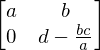

In [99]:
triangular(A)

---
# Exercícios

1. Considere a função sinal $sgn_{3}$ e escreva seus possíveis valores quando aplicada a todas as possibilidades do trio de número $j_{1},j_{2},j_{3}$ retirados do conjunto $\{1,2,3\}$. Por fim, diga a que função $sgn_{3}$ equivale (que vocês já usaram bastante no Curso de Física).

1. Escreva o produto vetorial usando $sgn_{3}$.

1. Verifique, usando o caso particular $(⋯,4,5,6,7,8,⋯)$, que precisamos fazer $2(q−p)−1=2(8−4)−1=7$ trocas entre pares de primeiros vizinhos para trocar os números $8$ e $4$.

1. Escreva a expressão geral para o determinante de uma matriz $A\in\mathbb{C}^{3\mathrm{x}3}$ (como fizemos em aula para uma matriz $A\in\mathbb{C}^{2\mathrm{x}2}$).

1. Escreva a matriz $A(3,1,2)$ em termos dos elementos da matriz $A$. Verifique que $\det(A(3,1,2))=-\det(A(1,3,2))$.
*
1. Mostre que se duas (ou mais) colunas de uma matriz são iguais, então seu determinante é nulo.

1. Mostre que se uma (ou mais) colunas de uma matriz é uma combinação linear de outras de suas colunas, então seu determinante é nulo.

1. Verifique que $(aA)^{\dagger}=a^{*}A^{\dagger}$, para $a\in\mathbb{C}$ e $A\in\mathbb{C}^{m\mathrm{x}n}$) com $n,m\in\mathbb{N}$.

1. Verifique que o determinante e os autovalores de $A^{\dagger}$, a adjunta da matriz $A$, são iguais ao complexo conjugado do determinante e dos autovalores de $A$, respectivamente.

1. Para $A=\begin{bmatrix}A_{1,1}&A_{1,2}\\A_{2,1}&A_{2,2}\end{bmatrix}$ e $B=\begin{bmatrix}B_{1,1}&B_{1,2}\\B_{2,1}&B_{2,2}\end{bmatrix}$, obtenha expressões para $\det(AB)$ e $\det(A+B)$ em termos dos elementos de matriz de $A$ e de $B$.

1. Verifique que se $A,B,C\in\mathbb{C}^{n\mathrm{x}n}$ são matrizes iguais a menos da $k$-ésima coluna e essa coluna de $C$ é uma combinação linear das colunas correspondentes de $A$ e $B$, i.e., $C_{j_{k},k} = \alpha A_{j_{k},k}+\beta B_{j_{k},k}$ com $\alpha,\beta\in\mathbb{C}$, então $\det(C)=\alpha\det(A)+\beta\det(B).$

1. Prove que para $A = \begin{bmatrix} B & \mathbb{O} \\ * & b  \end{bmatrix}$
uma matriz $n\text{x}n$, com $B$ é uma matriz $(n-1)\text{x}(n-1)$, $\mathbb{O}$ é uma matriz coluna nula $(n-1)\text{x}1$, e $*$ é uma matriz linha qualquer $1\text{x}(n-1))$, teremos $\det(A)=b\det(B).$

1. Para $A = \begin{bmatrix} 2 & 3 & 5 \\ 7 & 11 & 13 \\ 17 & 19 & 23  \end{bmatrix}$, calcule o menor $A^{(2,3)}$.

1. Para a matriz $A$ do último exercício, calcule o elemento de matriz $cof(A)_{2,3}$ da matriz de cofatores associada.

1. Prove a expansão em cofatores na coluna $k$: $\det(A) = \sum_{j=1}^{n}A_{j,k}cof(A)_{j,k}$.

1. Verifique que $(A^{-1}A)_{j,j}=1$ para $j=1,\cdots,n$ (analogamente ao que fizemos nas notas de aula).

1. Verifique que $(A^{-1}A)_{j,k}=0\space\forall j\ne k$ (analogamente ao que fizemos nas notas de aula).

1. Usando a relação com a matriz de cofatores, calcule a inversa da matriz: $A=\begin{bmatrix} 2 & 3 & 5 \\ 7 & 11 & 13 \\ 17 & 19 & 23  \end{bmatrix}$.

1. Obtenha a solução, via regra de Kramer, de um SELNH especificado pela matrix de coeficientes $A=\begin{bmatrix} 2 & 3 & 5 \\ 7 & 11 & 13 \\ 17 & 19 & 23  \end{bmatrix}$ e pelo vetor de não homogeneidade $|y\rangle = \begin{bmatrix} 29 \\ 31 \\ 37 \end{bmatrix}$.

1. Verifique que se trocamos uma coluna de uma matriz quadrada $A$ pela combinação linear dessa coluna com uma de suas outras colunas, i.e.,
\begin{equation}
|A_{j}\rangle \rightarrow |A_{j}\rangle + c|A_{l}\rangle,
\end{equation}
com $c\in\mathbb{C}$, não mudamos o determinante da matriz.

1. Usando o método de Gauss, coloque a matriz $A=\begin{bmatrix} 2 & 3 & 5 \\ 7 & 11 & 13 \\ 17 & 19 & 23  \end{bmatrix}$ na forma triangular e calcule seu determinante.